In [59]:
# Load data
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

# Read data
from numpy import genfromtxt

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture

# Setting plot style 
plt.style.use('fivethirtyeight') 

#Load Data
FBData = genfromtxt('/content/drive/My Drive/Colab Notebooks/Stats/dataset_Facebook.csv', delimiter=',', dtype=None, names=True)

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


In [87]:
#Prints shape and Data Cols
print(FBData.shape)
print(FBData.dtype.names)

#Extract Shares Col as my response variable and make them 2D arrays
response = FBData['share'].reshape(-1,1) 

#Setup Predictor Variable M1 / Paid
pInteraction = FBData['Total_Interactions'].reshape(-1,1)

#Setup more Predictor Variables for M2 / Likes, Comments
plikes = FBData['like'].reshape(-1,)
pcomment = FBData['comment'].reshape(-1,)
preach = FBData['Lifetime_Post_Total_Reach'].reshape(-1,)
pcombo = np.array([plikes,pcomment,preach])
pcombo = pcombo.transpose()

print(pcombo.shape) 
print(response.shape)

(499,)
('Page_total_likes', 'Type', 'Category', 'Post_Month', 'Post_Weekday', 'Post_Hour', 'Paid', 'Lifetime_Post_Total_Reach', 'Lifetime_Post_Total_Impressions', 'Lifetime_Engaged_Users', 'Lifetime_Post_Consumers', 'Lifetime_Post_Consumptions', 'Lifetime_Post_Impressions_by_people_who_have_liked_your_Page', 'Lifetime_Post_reach_by_people_who_like_your_Page', 'Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post', 'comment', 'like', 'share', 'Total_Interactions')
(499, 3)
(499, 1)


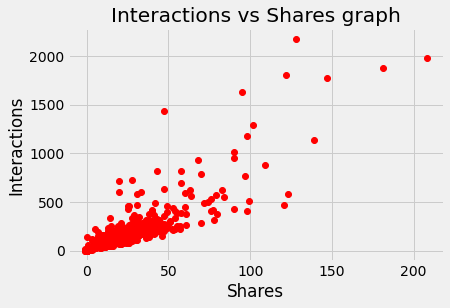

In [71]:
#plot graph Interactions vs Shares
plt.plot(response,pInteraction,'ro')
# naming the x axis 
plt.xlabel('Shares') 
# naming the y axis 
plt.ylabel('Interactions') 
# giving a title to my graph 
plt.title('Interactions vs Shares graph') 
# function to show the plot 
plt.show() 

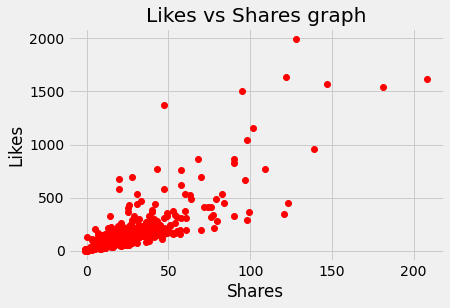

In [72]:
#plot graph Likes vs Shares
plt.plot(response,plikes,'ro')
# naming the x axis 
plt.xlabel('Shares') 
# naming the y axis 
plt.ylabel('Likes') 
# giving a title to my graph 
plt.title('Likes vs Shares graph') 
# function to show the plot 
plt.show() 

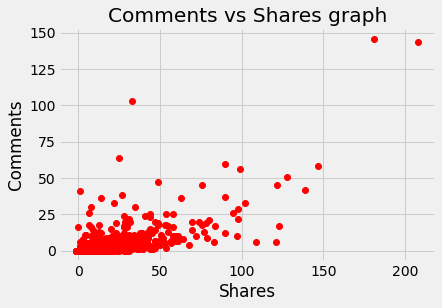

In [73]:
#plot graph Comments vs Shares
plt.plot(response,pcomment,'ro')
# naming the x axis 
plt.xlabel('Shares') 
# naming the y axis 
plt.ylabel('Comments') 
# giving a title to my graph 
plt.title('Comments vs Shares graph') 
# function to show the plot 
plt.show() 

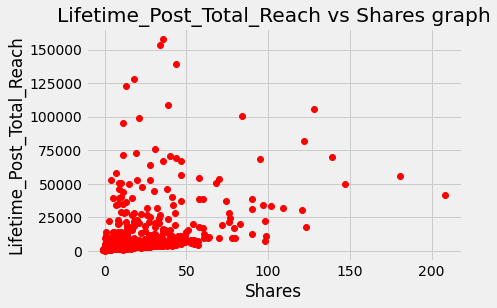

In [88]:
#plot graph Comments vs Shares
plt.plot(response,preach,'ro')
# naming the x axis 
plt.xlabel('Shares') 
# naming the y axis 
plt.ylabel('Lifetime_Post_Total_Reach') 
# giving a title to my graph 
plt.title('Lifetime_Post_Total_Reach vs Shares graph') 
# function to show the plot 
plt.show() 

In [89]:
#Setup Linear Regression Model
M1 = LinearRegression()

#Fit model and get R Squared Error
M1.fit(response,pInteraction)
Rsqr = M1.score(response, pInteraction)
print('coefficient of determination:', Rsqr)
print('intercept:', M1.intercept_)
print('slope:', M1.coef_)

#Predict
pred = M1.predict(response)
print(pInteraction[68])
print('Predicted response:', pred[68])

# Compare with AIC
AIC = GaussianMixture(n_components=1, init_params='kmeans')
AIC.fit(response)
print('AIC:',AIC.aic(response))

coefficient of determination: 0.717013110591476
intercept: [-25.179352]
slope: [[8.82093454]]
[70]
Predicted response: [124.77653512]
AIC: 4643.439104412824


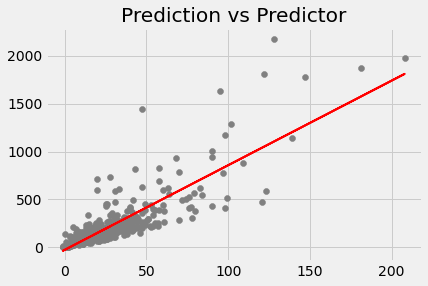

In [90]:
# Plotting prediction vs predictor data
plt.scatter(response, pInteraction,  color='gray')
# giving a title to my graph 
plt.title('Prediction vs Predictor') 
plt.plot(response, pred, color='red', linewidth=2)
plt.show()

In [91]:
#Setup Linear Regression Model
M2 = LinearRegression()

#Fit model and get R Squared Error
M2.fit(response,pcombo)
#Rsqr = M1.score(response,pcombo)
print('coefficient of determination:', Rsqr)
print('intercept:', M2.intercept_)
print('slope:', M2.coef_)

#Predict
pred = M2.predict(response)
print(pcombo[68])
print('Predicted response:', pred[68])

# Compare with AIC
AIC = GaussianMixture(n_components=2, init_params='kmeans')
AIC.fit(response)
print('AIC:',AIC.aic(response))

coefficient of determination: 0.717013110591476
intercept: [-2.30279540e+01 -2.17202666e+00  6.07841779e+03]
slope: [[  7.47155923]
 [  0.34979115]
 [293.64253927]]
[  53    0 2168]
Predicted response: [1.03988553e+02 3.77442284e+00 1.10703410e+04]
AIC: 4339.614857521941


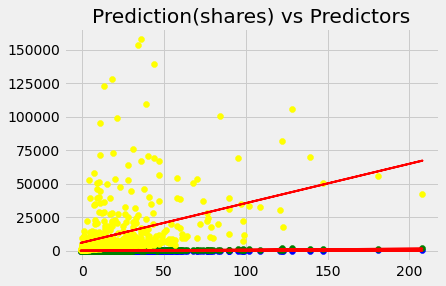

In [95]:
plt.scatter(response,pcomment,color='blue')
plt.scatter(response,plikes,color='green')
plt.scatter(response,preach,color='yellow')
plt.title('Prediction(shares) vs Predictors') 
plt.plot(response, pred, color='red', linewidth=2)
plt.show()